In [1]:
!pip install layoutparser
!pip install "layoutparser[ocr]"

!apt install tesseract-ocr
!apt install tesseract-ocr-tha
!apt install libtesseract-dev

# restart notebook

     |████████████████████████████████| 19.2 MB 31.8 MB/s 
     |████████████████████████████████| 596 kB 52.5 MB/s 
     |████████████████████████████████| 46 kB 4.3 MB/s 
     |████████████████████████████████| 5.6 MB 46.1 MB/s 
     |████████████████████████████████| 4.3 MB 36.9 MB/s 
     |████████████████████████████████| 139 kB 41.3 MB/s 
     |████████████████████████████████| 3.6 MB 42.2 MB/s 
  Created wheel for pdfplumber: filename=pdfplumber-0.6.0-py3-none-any.whl size=33688 sha256=949386d063a84e69cd2aa0a341a8cc6ae9df6a2a822ba877c59ff955e07b9caf
  Stored in directory: /root/.cache/pip/wheels/58/56/fe/2e93d842ffa9ea97746c1ab253d43502ed61c0689361a0224e
Successfully built pdfplumber
  Attempting uninstall: pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13

     |████████████████████████████████| 435 kB 27.7 MB/s 
  Created wheel for pytesseract: filename=pytesseract-0.3.8-py2.py3-none-any.whl size=14070 sha256=3161077c56cfc50e0f90750f21054342a1d893245af192b0d8735838d9eb3166
  Stored in directory: /root/.cache/pip/wheels/a4/89/b9/3f11250225d0f90e5454fcc30fd1b7208db226850715aa9ace
Successfully built pytesseract


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 37 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 1s (5,419 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 155229 files and directories currently installed.)
Preparing to unpack .../tesserac

In [1]:
import layoutparser as lp 
import matplotlib.pyplot as plt
%matplotlib inline 
import pandas as pd
import numpy as np
import cv2

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
! ls "/content/drive/MyDrive/SuperAI/OCR Layout/layout-parser/examples"
path = "/content/drive/MyDrive/SuperAI/OCR Layout/layout-parser/examples/"

'01 Simple Text Detection Pytesseract.ipynb'
'02 Simple Thai Text Detection Pytesseract.ipynb'
'03 Table OCR Layout Parser.ipynb'
'04 Table Thai OCR Layout Parser.ipynb'
 data
 infra-bedrock-339714-ab34f3105bbd.json
'input images'
'original codes'


In [4]:
ocr_agent = lp.GCVAgent.with_credential(path+"infra-bedrock-339714-ab34f3105bbd.json", 
                                        languages = ['th'])

In [5]:
from google.colab import files
uploaded = files.upload()

Saving thai_2.JPG to thai_2.JPG


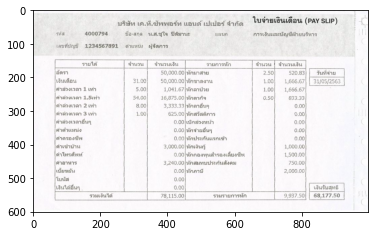

In [6]:

image = cv2.imread("thai_2.JPG")
plt.imshow(image);

In [7]:
res = ocr_agent.detect(image, return_response=True)
texts  = ocr_agent.gather_text_annotations(res) 
    # collect all the texts without coordinates
layout = ocr_agent.gather_full_text_annotation(res, agg_level=lp.GCVFeatureType.WORD)
    # collect all the layout elements of the `WORD` level
print("==Layout")
for b in layout:
    print(b)

==Layout
TextBlock(block=Quadrilateral(points=[[654  13]
 [678  14]
 [677  42]
 [653  41]], width=25, height=29), text=ใบ, id=0, type=None, parent=None, next=None, score=0.9900000095367432)
TextBlock(block=Quadrilateral(points=[[687  13]
 [716  14]
 [715  43]
 [686  42]], width=30, height=30), text=จ่าย, id=1, type=None, parent=None, next=None, score=0.9900000095367432)
TextBlock(block=Quadrilateral(points=[[715  14]
 [802  16]
 [801  45]
 [714  43]], width=88, height=31), text=เงินเดือน, id=2, type=None, parent=None, next=None, score=0.9900000095367432)
TextBlock(block=Quadrilateral(points=[[811  16]
 [816  16]
 [815  44]
 [810  44]], width=6, height=28), text=(, id=3, type=None, parent=None, next=None, score=0.9200000166893005)
TextBlock(block=Quadrilateral(points=[[821  16]
 [852  17]
 [851  46]
 [820  45]], width=32, height=30), text=PAY, id=4, type=None, parent=None, next=None, score=0.9900000095367432)
TextBlock(block=Quadrilateral(points=[[859  17]
 [897  18]
 [896  47]
 [858  4

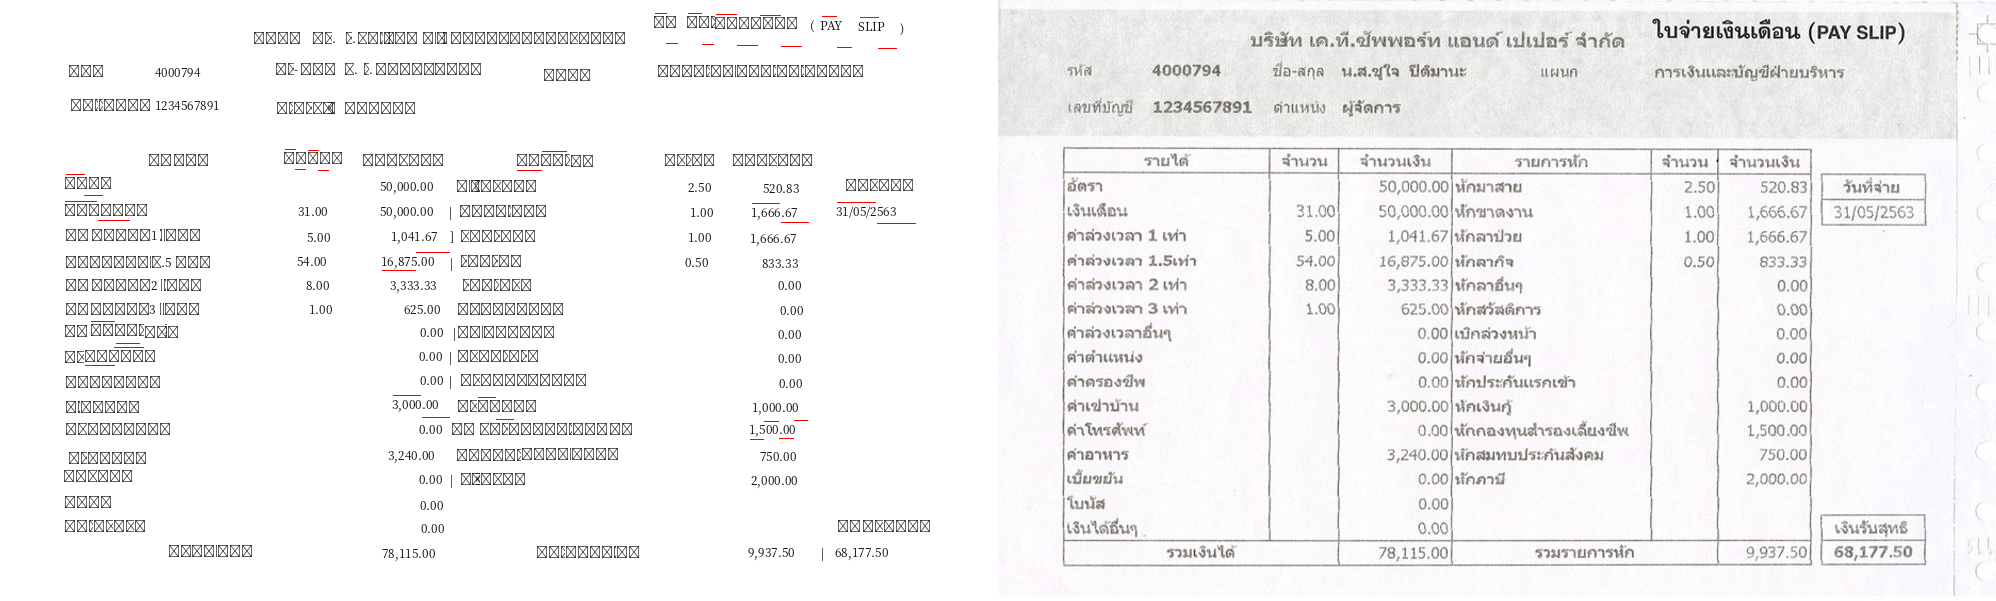

In [8]:
lp.draw_text(image, layout, font_size=12, with_box_on_text=True,
             text_box_width=1)

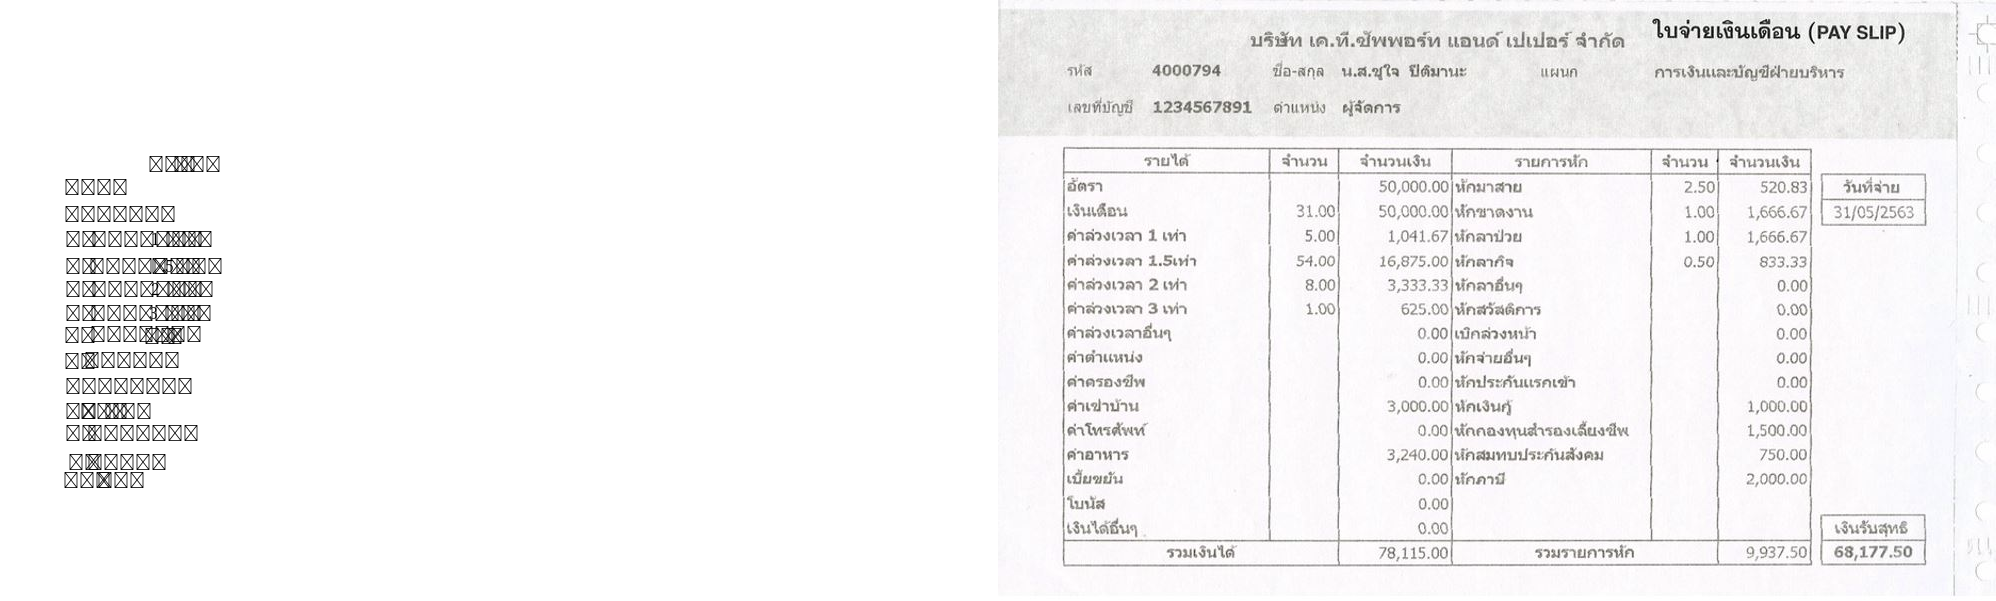

In [30]:
filtered_residence = layout.filter_by(
    lp.Rectangle(x_1=50, y_1=150, x_2=200, y_2=500),
    soft_margin = {"left":30, "right":30} # Without it, the last 4 rows could not be included
)
lp.draw_text(image, filtered_residence, font_size=16)

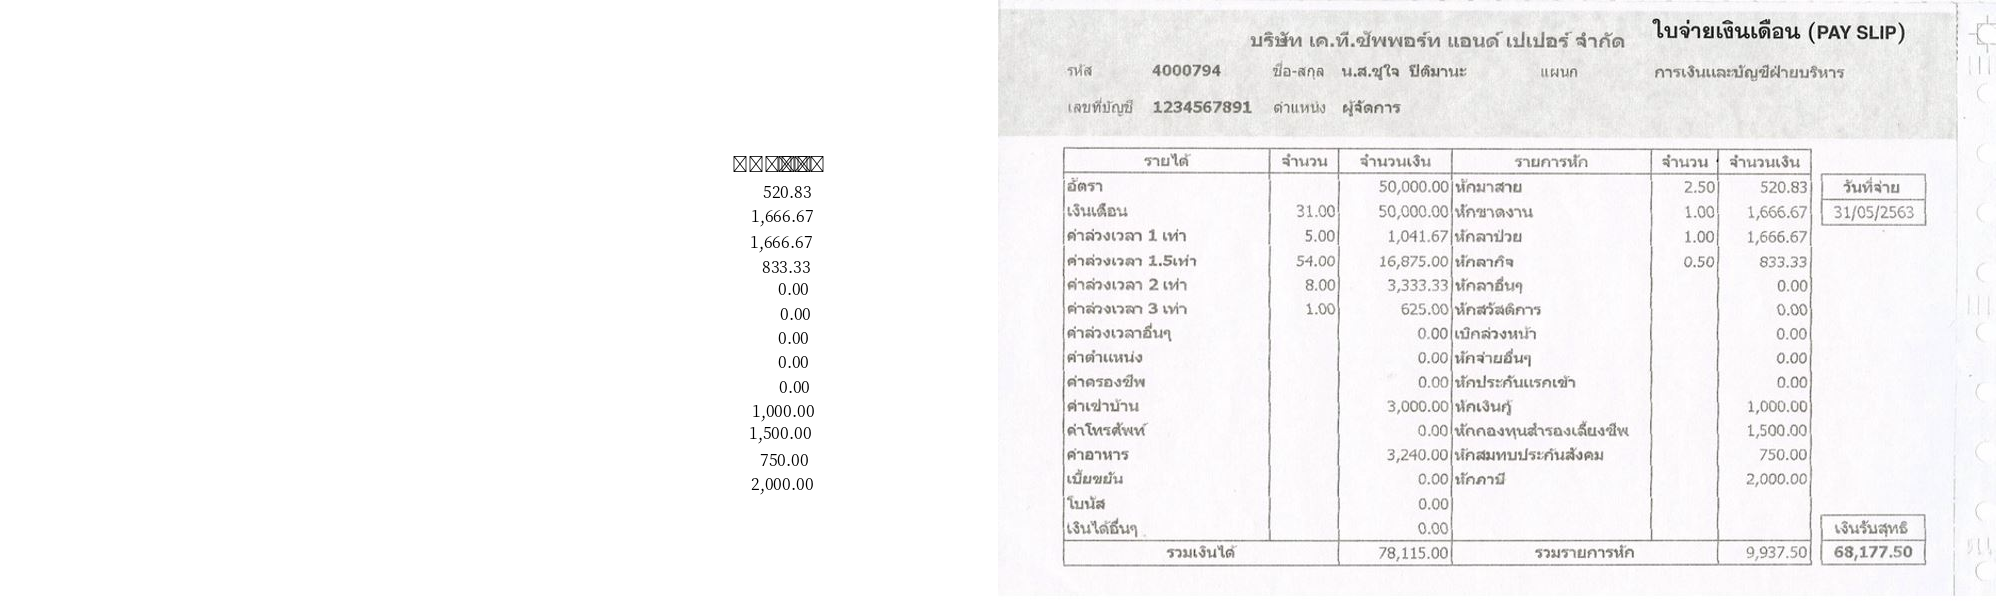

In [64]:
filter_lotno = layout.filter_by(
    
    lp.Rectangle(x_1=730, y_1=150, x_2=820, y_2=500),
    #soft_margin = {"left":10, "right":20} # Without it, the last 4 rows could not be included
)
lp.draw_text(image, filter_lotno, font_size=16)

In [65]:
y_0 = 150
n_rows = 14
height = 24
y_1 = y_0+n_rows*height

row = []
for y in range(y_0, y_1, height):
    
    interval = lp.Interval(y,y+height, axis='y')
    residence_row = filtered_residence.\
        filter_by(interval).\
        get_texts()
    y2 = y +1
    interval = lp.Interval(y2,y2+height, axis='y')
    lotno_row = filter_lotno.\
        filter_by(interval).\
        get_texts()
    
    row.append([''.join(residence_row), ''.join(lotno_row)])
row

[['รายได้', 'จำนวนเงิน'],
 ['อัตรา', '520.83'],
 ['เงินเดือน', '1,666.67'],
 ['ค่าล่วงเวลา1เท่า', '1,666.67'],
 ['ค่าล่วงเวลาน.5เท่า', '833.33'],
 ['ค่าล่วงเวลา2เท่า', '0.00'],
 ['ค่าล่วงเวลา3เท่า', '0.00'],
 ['ค่าล่วงเวลาอื่นๆ', '0.00'],
 ['ค่าตำแหน่ง', '0.00'],
 ['ค่าครองชีพ', '0.00'],
 ['ค่าเช่าบ้าน', '1,000.00'],
 ['ค่าโทรศัพท์', '1,500.00'],
 ['คาอาหาร', '750.00'],
 ['เบี้ยขยัน', '']]